In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

#1.Reading the Dataset BikeSharingDay
import csv
import pandas as pd

#Import Matplotlib for the Plotting
import matplotlib as plt
%matplotlib inline

#Dataset BikeSharing
filename='BikeSharingDay.csv'

#Reading the CSV-File as dataframe
dataframe = pd.read_csv(filename)

#print the head of the dataset
dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [155]:
#List the Data types to See the changes
dataframe.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

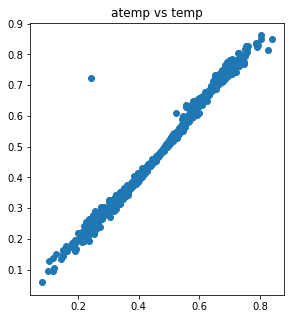

In [156]:
#Da uns auffält das atemp und temp sehr stark mit einander korrelieren
# betrachte wir die zwei Attribute genauer
fig = plt.pyplot.figure(figsize=(10,5))
plt1 = fig.add_subplot(121)
plt1.set_title('atemp vs temp')
plt1.scatter(dataframe["atemp"], dataframe["temp"])

In [157]:
#Korrolation zwischen zwei Ordinale Attribute mit Kendall Tau
import scipy.stats as stats

tau, p_value = stats.kendalltau(dataframe['season'], dataframe['weathersit'])
print ('Kendall Tau Rank correlation (season & weathersit): ', tau)


Kendall Tau Rank correlation (season & weathersit):  0.004939843958952154


In [158]:
# erstelle das Kartesische Produkt von Season und WeatherSit
from itertools import product

season = dataframe['season']
schluesselSeason, haeufigkeitSeason = np.unique(season.astype(int), return_counts = True)

wheathersit = dataframe['weathersit']
schluesselwheathersit, haeufigkeitwheathersit = np.unique(season.astype(int), return_counts = True)

kart = list(product(schluesselSeason, schluesselwheathersit))

seasonWithWeatherSit = np.zeros(len(season))

indexOfNewAttribut = 0 
for i in range(len(season)):
    for k in range(len(wheathersit)):
        if indexOfNewAttribut > 730:
            break
        if season[i] == 1 and wheathersit[k] == 1:
            seasonWithWeatherSit[indexOfNewAttribut] = 1
        if season[i] == 1 and wheathersit[k] == 2:
            seasonWithWeatherSit[indexOfNewAttribut] = 2
        if season[i] == 1 and wheathersit[k] == 3:
            seasonWithWeatherSit[indexOfNewAttribut] = 3
        if season[i] == 1 and wheathersit[k] == 4:
            seasonWithWeatherSit[indexOfNewAttribut] = 4
        if season[i] == 2 and wheathersit[k] == 1:
            seasonWithWeatherSit[indexOfNewAttribut] = 5
        if season[i] == 2 and wheathersit[k] == 2:
            seasonWithWeatherSit[indexOfNewAttribut] = 6
        if season[i] == 2 and wheathersit[k] == 3:
            seasonWithWeatherSit[indexOfNewAttribut] = 7
        if season[i] == 2 and wheathersit[k] == 4:
            seasonWithWeatherSit[indexOfNewAttribut] = 8
        if season[i] == 3 and wheathersit[k] == 1:
            seasonWithWeatherSit[indexOfNewAttribut] = 9
        if season[i] == 3 and wheathersit[k] == 2:
            seasonWithWeatherSit[indexOfNewAttribut] = 10
        if season[i] == 3 and wheathersit[k] == 3:
            seasonWithWeatherSit[indexOfNewAttribut] = 11
        if season[i] == 3 and wheathersit[k] == 4:
            seasonWithWeatherSit[indexOfNewAttribut] = 12
        if season[i] == 4 and wheathersit[k] == 1:
            seasonWithWeatherSit[indexOfNewAttribut] = 13
        if season[i] == 4 and wheathersit[k] == 2:
            seasonWithWeatherSit[indexOfNewAttribut] = 14
        if season[i] == 4 and wheathersit[k] == 3:
            seasonWithWeatherSit[indexOfNewAttribut] = 15
        if season[i] == 4 and wheathersit[k] == 4:
            seasonWithWeatherSit[indexOfNewAttribut] = 16
        indexOfNewAttribut = indexOfNewAttribut + 1

[1 2 3 4]
[1 2 3 4]
[(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4)]


R2 (Correlation coefficient ):  0.7969806734307076
Mean absolute error:  644.3750930704
Root mean squared error:  853.0350122668555
Max Error:  3593.8736683440966


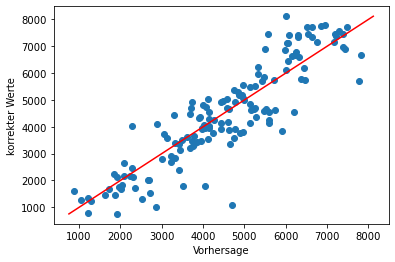

In [159]:
#1. Experiment Ohne kartesisches Produkt von Season und WheaterSit

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, max_error
import math

dataframe_y = dataframe.cnt
dataframe_X = dataframe.drop(['instant','cnt','registered','casual','dteday','weekday','mnth', 'atemp'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(dataframe_X, dataframe_y, test_size = 0.2, random_state = 3)

model = LinearRegression()

# 6. Model füllen mit train daten
model.fit(x_train, y_train)

# 7. Vorhersage mit Testdaten
y_vorhersage = model.predict(x_test)

r2Score = r2_score(y_test, y_vorhersage)
print('R2 (Correlation coefficient ): ', r2Score)

mae = mean_absolute_error(y_test, y_vorhersage)
print('Mean absolute error: ', mae)
    
mse = mean_squared_error(y_test, y_vorhersage,squared=True)
mse = math.sqrt(mse)
print('Root mean squared error: ', mse)
    
maxerror = max_error(y_test, y_vorhersage)
print('Max Error: ', maxerror)
    
plt.pyplot.scatter(y_vorhersage, y_test)
    
minimum = math.ceil(min(y_test))
maximum = math.ceil(max(y_test))
    
plt.pyplot.plot( [minimum,maximum],[minimum,maximum], color='red')
plt.pyplot.xlabel('Vorhersage')
plt.pyplot.ylabel('korrekter Werte')
plt.pyplot.show()

R2 (Correlation coefficient ):  0.7547609470376276
Mean absolute error:  764.7937197510822
Root mean squared error:  937.5468534843881
Max Error:  2943.430203673364


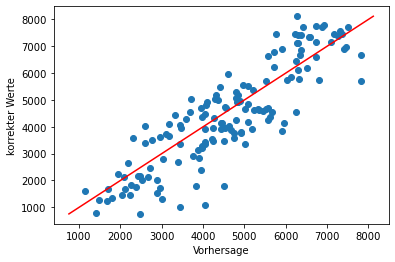

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, max_error
import math

dataframe_y = dataframe.cnt
dataframe_X = dataframe.drop(['instant','cnt','registered','casual','dteday','weekday','mnth',"season",'weathersit', 'atemp'], axis=1)
dataframe_X['seasonWithWeatherSit'] = seasonWithWeatherSit

x_train, x_test, y_train, y_test = train_test_split(dataframe_X, dataframe_y, test_size = 0.2, random_state = 3)

model = LinearRegression()

# 6. Model füllen mit train daten
model.fit(x_train, y_train)

# 7. Vorhersage mit Testdaten
y_vorhersage = model.predict(x_test)

r2Score = r2_score(y_test, y_vorhersage)
print('R2 (Correlation coefficient ): ', r2Score)

mae = mean_absolute_error(y_test, y_vorhersage)
print('Mean absolute error: ', mae)
    
mse = mean_squared_error(y_test, y_vorhersage,squared=True)
mse = math.sqrt(mse)
print('Root mean squared error: ', mse)
    
maxerror = max_error(y_test, y_vorhersage)
print('Max Error: ', maxerror)
    
plt.pyplot.scatter(y_vorhersage, y_test)
    
minimum = math.ceil(min(y_test))
maximum = math.ceil(max(y_test))
    
plt.pyplot.plot( [minimum,maximum],[minimum,maximum], color='red')
plt.pyplot.xlabel('Vorhersage')
plt.pyplot.ylabel('korrekter Werte')
plt.pyplot.show()



Fold Nummer:  0
R2 (Correlation coefficient ):  0.6477207373807023
Mean absolute error:  908.3731920063633
Root mean squared error:  1129.6474545644855
Max Error:  3252.0553100457328


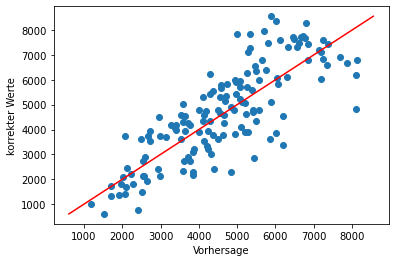



Fold Nummer:  1
R2 (Correlation coefficient ):  0.7983196633426036
Mean absolute error:  740.3301791017404
Root mean squared error:  921.6471505699368
Max Error:  2725.5852864682074


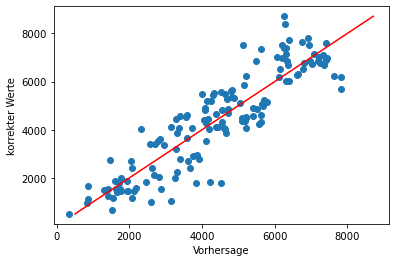



Fold Nummer:  2
R2 (Correlation coefficient ):  0.7583228107697064
Mean absolute error:  703.586496814244
Root mean squared error:  871.7162365141775
Max Error:  2554.948787463578


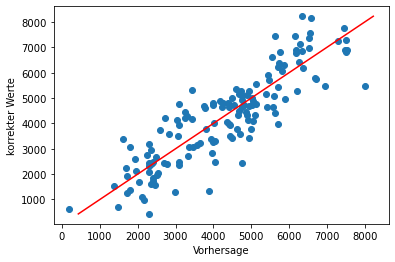



Fold Nummer:  3
R2 (Correlation coefficient ):  0.7222700959395549
Mean absolute error:  824.9694894504058
Root mean squared error:  1055.7634250248457
Max Error:  3725.8898377426094


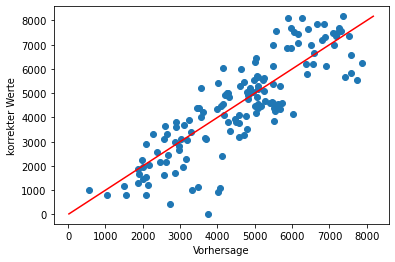



Fold Nummer:  4
R2 (Correlation coefficient ):  0.7566405505350065
Mean absolute error:  741.0335529146013
Root mean squared error:  934.081636904238
Max Error:  3252.4463041761974


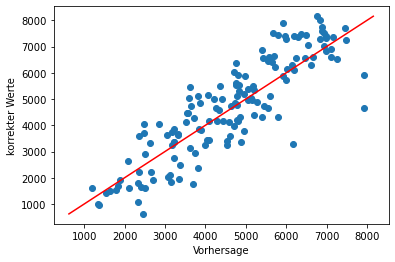

In [161]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, max_error
# from sklearn.metrics import mean_absolute_percentage_error

randomSeed = 7
kfold = KFold(n_splits=5, shuffle = True, random_state=randomSeed)
indexFold = 0


for train_index, test_index in kfold.split(dataframe_X, dataframe_y):
    
    x_train, x_test = dataframe_X.iloc[list(train_index)], dataframe_X.iloc[list(test_index)]
    y_train, y_test = dataframe_y.iloc[list(train_index)], dataframe_y.iloc[list(test_index)]

    # Linear Regression
    linearR = LinearRegression()

    # daten füllen aus dem Folds
    model = linearR.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)

    print('\n')
    print('Fold Nummer: ', indexFold)
    r2Score = r2_score(y_test, y_pred)
    print('R2 (Correlation coefficient ): ', r2Score)

    mae = mean_absolute_error(y_test, y_pred)
    print('Mean absolute error: ', mae)
    
    mse = mean_squared_error(y_test, y_pred,squared=True)
    rmse = math.sqrt(mse)
    print('Root mean squared error: ', rmse)
    
    maxerror = max_error(y_test, y_pred)
    print('Max Error: ', maxerror)
    
    # Ab version 2.4 möglich
#     mape = mean_absolute_percentage_error(y_true, y_pred)
#     print('Mean Absolute Percentage Error: ', mape)
    
    plt.pyplot.scatter(y_pred, y_test)
    
    minimum = math.ceil(min(y_test))
    maximum = math.ceil(max(y_test))
    
    plt.pyplot.plot( [minimum,maximum],[minimum,maximum], color='red')
    plt.pyplot.xlabel('Vorhersage')
    plt.pyplot.ylabel('korrekter Werte')
    plt.pyplot.show()
    
    indexFold = indexFold + 1

